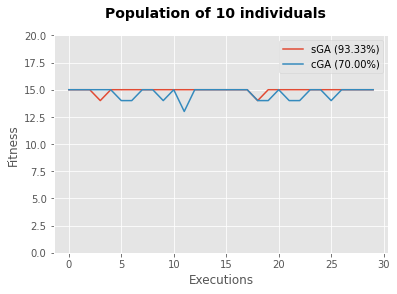

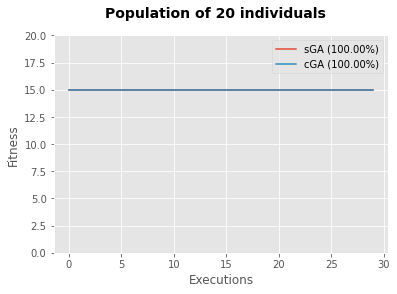

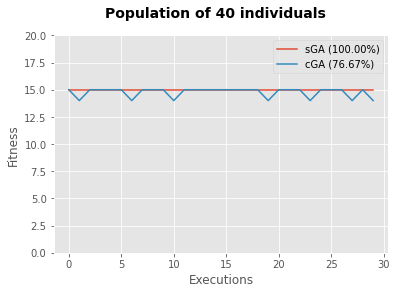

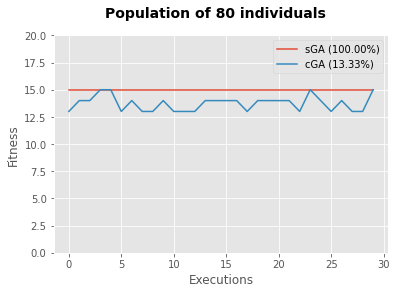

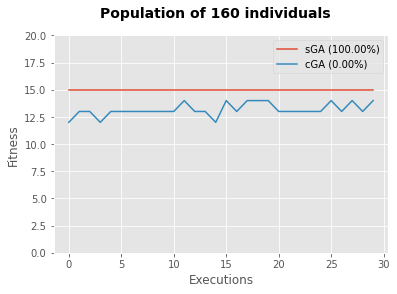

In [1]:
################################################################################
## Imports

from random import random
from pyeasyga import pyeasyga
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

################################################################################
## Common code

# Population sizes
sizes = [10, 20, 40, 80, 160]

# Number of tests
tests = 30

# Fitness of the global solution
global_fitness = 15

# Data
data = [0] * 15

# Define fitness function
def fitness_function(individual, data=None):
  return sum(individual)

################################################################################
## Simple Genetic Algorithm (sGA)

# Best fitness of each execution
fitness_sga = []

for ps in sizes:
  popfit = []
  for _ in range(tests):
    # Initialize genetic algorithm
    sga = pyeasyga.GeneticAlgorithm(data, population_size=ps)
    # Set fitness function
    sga.fitness_function = fitness_function
    # Run sGA
    sga.run()
    # Get best individual
    fitness, result = sga.best_individual()
    popfit.append(fitness)
  fitness_sga.append(popfit)

################################################################################
## Compact Genetic Algorithm (cGA)

# Best fitness of each execution
fitness_cga = []

# Update probability vector
def update_prob(winner, loser, prob, popsize):
  for i in range(0, len(prob)):
    if winner[i] != loser[i]:
      if winner[i] == 1:
        prob[i] += 1.0 / float(popsize)
      else:
        prob[i] -= 1.0 / float(popsize)

# Create a new individual
def create_individual(prob):
  individual = []
  for p in prob:
    if random() < p:
      individual.append(1)
    else:
      individual.append(0)
  return pyeasyga.Chromosome(individual)

# Make competition between two individuals
def compete(a, b):
  if a.fitness > b.fitness:
    return a, b
  else:
    return b, a

# Set evolution function
def run(self):
  # Initialize probability vector
  prob = [0.5] * len(self.seed_data)
  # Initialize best solution
  best = None
  # Run `i` generations
  for _ in range(0, self.generations):
    # Create individuals
    a = self.create_individual(prob)
    b = self.create_individual(prob)
    # Calculate fitness for each individual
    a.fitness = self.fitness_function(a.genes)
    b.fitness = self.fitness_function(b.genes)
    # Get the best and worst individual
    winner, loser = compete(a, b)
    # Update best solution
    if best:
      if winner.fitness > best.fitness:
        best = winner
    else:
      best = winner
    # Update the probability vector based on the success of each bit
    update_prob(winner.genes, loser.genes, prob, self.population_size)
  # Add final solution
  self.current_generation.append(best)

for ps in sizes:
  popfit = []
  for _ in range(tests):
    # Initialize genetic algorithm
    cga = pyeasyga.GeneticAlgorithm(data, population_size=ps)
    # Set create individual function
    cga.create_individual = create_individual
    # Set fitness function
    cga.fitness_function = fitness_function
    # Set evolution function
    cga.run = run
    # Run evolution
    cga.run(cga)
    # Get best individual
    fitness, result = cga.best_individual()
    popfit.append(fitness)
  fitness_cga.append(popfit)

################################################################################
## Plot comparison charts

for i in range(len(sizes)):
  sga_accuracy = 0.0
  for f in fitness_sga[i]:
    sga_accuracy += 1 if f == global_fitness else 0
  sga_accuracy /= tests
  cga_accuracy = 0.0
  for f in fitness_cga[i]:
    cga_accuracy += 1 if f == global_fitness else 0
  cga_accuracy /= tests
  # Plot
  fig = plt.figure()
  fig.suptitle('Population of ' + str(sizes[i]) + ' individuals',
     fontsize=14, fontweight='bold')
  line_sga, = plt.plot(fitness_sga[i])
  line_cga, = plt.plot(fitness_cga[i])
  plt.ylim(0, 20)
  plt.legend([line_sga, line_cga],
    ['sGA ({:.2f}%)'.format(sga_accuracy*100),
     'cGA ({:.2f}%)'.format(cga_accuracy*100)])
  plt.xlabel('Executions')
  plt.ylabel('Fitness')
  plt.show()

################################################################################